<a href="https://colab.research.google.com/github/krucx/ML_from_scratch/blob/main/Multiclass_LogisticRegression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_Data(X,Y,cmaping):
  x1 = []
  x2 = []
  color = []
  for i in range(X.shape[0]):
    color.append(cmaping[0])
    for j in range(Y.shape[1]):
      if Y[i][j]==1:
        color[i] = cmaping[j]
    x1.append(X[i][0])
    x2.append(X[i][1])
  plt.scatter(x1,x2,c=color)

In [ ]:
def create_dataset(n=150,classes=3,mean=[[-2,-2],[2,-2],[0,2]]):
  x = []
  y = []
  per_class = n//classes
  for i in range(classes):
    for j in range(per_class):
      yp = [0]*classes
      yp[i]=1
      x.append([np.random.rand(1)*2-1+mean[i][0],np.random.rand(1)*2-1+mean[i][1],1])
      y.append(yp)
  return x,y

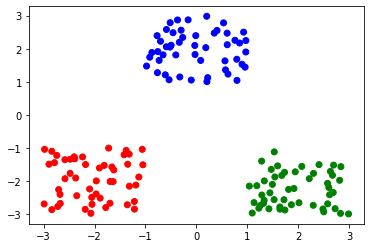

In [ ]:
x,y = create_dataset() # create_dataset(180,4,mean=[[-2,-2],[2,-2],[2,2],[-2,2]]) for 4 classes
X = np.array(x)
Y = np.array(y)
X = X.astype('float')  # to avoid np.std() error 'numpy.ndarray' object has no attribute 'sqrt'
plot_Data(X,Y,cmaping=['r','g','b','y'])

In [ ]:
def normalize(X,cols=[1,2]):
  means = np.mean(X,axis=0)
  std = np.std(X,axis=0)
  for i in cols:
    X[:,i] = (X[:,i] - means[i])/std[i]
  return X

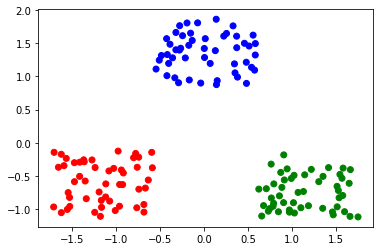

In [ ]:
X = normalize(X,[0,1])
plot_Data(X,Y,cmaping=['r','g','b','y'])

In [ ]:
def softmax(Z):
  exp = np.exp(Z)
  sums = np.sum(exp,axis=1)
  return exp/np.expand_dims(sums,axis=1) 

In [ ]:
def crossentropy(X,Y,theta):
  return (-1/X.shape[0])*np.sum(np.sum(Y*np.log(softmax(np.dot(X,theta.T))),axis=1),axis=0)

In [ ]:
def logisticReg_gd(X,Y,epochs=1000,l_r=0.3):
  theta = np.random.rand(Y.shape[1],X.shape[1])
  loss = []
  for i in range(epochs):
    theta_update = (1/X.shape[0])*np.dot((softmax(np.dot(X,theta.T))-Y).T,X)
    theta = theta - l_r*theta_update
    loss.append(crossentropy(X,Y,theta))
  return theta,loss

[[-5.09331638 -2.34068774  0.53436154]
 [ 5.89618431 -2.59061351  0.15072167]
 [ 1.0894303   7.26608815  0.09414108]]
0.0002211374032352866


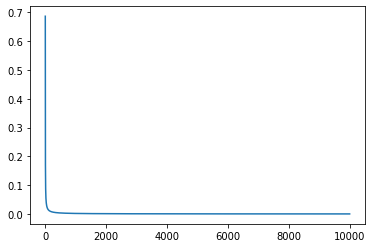

In [ ]:
epochs=10000
theta,loss = logisticReg_gd(X,Y,epochs,1)
print(theta)
print(loss[-1])
plt.plot(range(epochs),loss)
plt.show()

In [ ]:
def testRandomlyOnDataset(X,Y,theta):
  index = np.random.randint(X.shape[0])
  prediction = softmax(np.dot(X[index:index+1],theta.T))
  print("Prediction {}   Expected {}".format(prediction,Y[index]))

In [ ]:
testRandomlyOnDataset(X,Y,theta)

Prediction [[9.99991165e-01 2.26439232e-07 8.60846674e-06]]   Expected [1 0 0]


In [ ]:
def plot_lines(theta,cmaping,r=1):
  x_plot = np.linspace(-r,r,50)
  for i in range(theta.shape[0]):
    plt.plot(x_plot,(-x_plot*theta[i][0]-theta[i][2])/theta[i][1],c=cmaping[i])

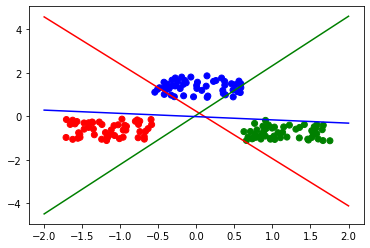

In [ ]:
plot_Data(X,Y,cmaping=['r','g','b','y'])
plot_lines(theta,cmaping=['r','g','b','y'],r=2)